# Photoelectric Effect Lab
### Author: Ayush Pandhi (1003227457)
### Date: November 22, 2018

### General Setup

In [17]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [18]:
#Defining the linear model function
def f(x, a, b):
    return a*x + b

In [19]:
#Loading Data Sets for Exercise 1
wavelength = (10**(-9))*(np.loadtxt('PE Effect Ex1 1.txt', skiprows=2, usecols=(0,)))
vstop = (np.loadtxt('PE Effect Ex1 1.txt', skiprows=2, usecols=(1,)))

#Loading Data Sets for Exercise 2
intensitylvl = np.loadtxt('PE Effect Ex2 1.txt', skiprows=2, usecols=(0,))
photocurrent = np.loadtxt('PE Effect Ex2 1.txt', skiprows=2, usecols=(1,))
vstop2 = np.loadtxt('PE Effect Ex2 1.txt', skiprows=2, usecols=(2,))

### Exercise 1

In [27]:
#Computing frequency from wavelength
frequency = (3*10**8)/wavelength

#Estimated errors from equipment
v_error = np.empty(len(vstop))
for i in range(len(vstop)):
    v_error[i] = max(vstop[i]*0.0010, 0.01)
    
#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, frequency, vstop, (0, 0), v_error, True) 
lin_output = f(frequency, p_opt_1[0], p_opt_1[1])
print(p_cov_1)

[[ 1.45677594e-33 -8.42517612e-19]
 [-8.42517612e-19  5.01550715e-04]]


Chi squared for linear regression:  17.214228261764887


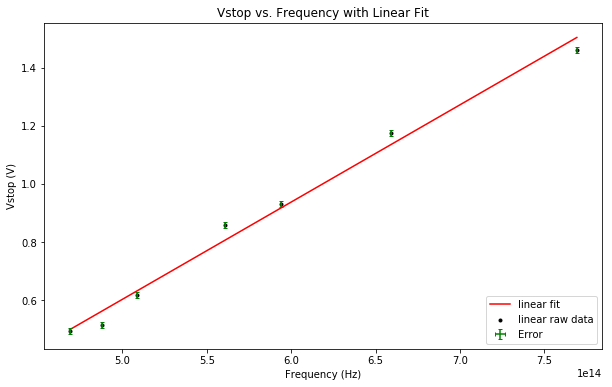

In [21]:
#Calculating chi squared
chi_sq = (1/5)*(np.sum(((vstop - lin_output)/v_error)**2))
print('Chi squared for linear regression: ', chi_sq)

#Plot of Vstop vs Frequency
plt.figure(figsize=(10,6))
plt.scatter(frequency, vstop, label = 'linear raw data', marker='.', color='k')
plt.plot(frequency, lin_output, 'r-', label = 'linear fit')
plt.title('Vstop vs. Frequency with Linear Fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vstop (V)')
plt.errorbar(frequency, vstop, xerr=0, yerr=v_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend(loc='lower right')
plt.show()

In [29]:
#Outputting Planck's Constant h
h = p_opt_1[0]*(1.6*10**(-19))
h_error = p_cov_1[0,0]*(1.6*10**(-19))
print('Estimated Plancks Constant: ', h, '+/-', h_error)

#Outputting the Work Function
wf = p_opt_1[1]*(1.6*10**(-19))
wf_error = p_cov_1[1,1]*(1.6*10**(-19))
print('Estimated Work Function: ', wf, '+/-', wf_error)

#Outputting the cut-off frequency
f0 = (1.6*10**(-19))*p_opt_1[1]/h
f0_error = p_cov_1[1,1]*(1.6*10**(-19))/h
print('Estimated Cut-off Frequency: ', f0, '+/-', f0_error)

Estimated Plancks Constant:  5.3526273387346e-34 +/- 2.330841496745391e-52
Estimated Work Function:  -1.7114312977539858e-19 +/- 8.024811436085398e-23
Estimated Cut-off Frequency:  -319736680595922.2 +/- 149922849625.89084


### Exercise 2

In [23]:
#Estimated errors from equipment
v_error2 = np.empty(len(vstop2))
for i in range(len(vstop2)):
    v_error2[i] = max(vstop2[i]*0.0010, 0.01)

i_error = np.empty(len(photocurrent))
for i in range(len(photocurrent)):
    i_error[i] = max(photocurrent[i]*0.0030, 0.01)
    
#Linear regression
p_opt_2, p_cov_2 = curve_fit(f, intensitylvl, vstop2, (0, 0), v_error2, True) 
lin_output2 = f(intensitylvl, p_opt_2[0], p_opt_2[1])

#Linear regression
p_opt_3, p_cov_3 = curve_fit(f, intensitylvl, photocurrent, (0, 0), i_error, True) 
lin_output3 = f(intensitylvl, p_opt_3[0], p_opt_3[1])

Chi squared for linear regression:  0.021000000000005986


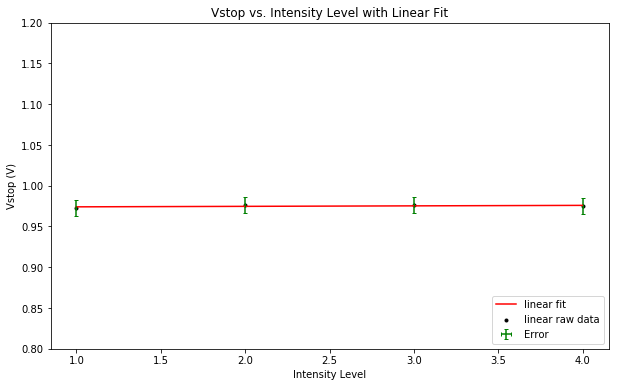

In [24]:
#Calculating chi squared
chi_sq = (1/2)*(np.sum(((vstop2 - lin_output2)/v_error2)**2))
print('Chi squared for linear regression: ', chi_sq)

#Plot of Vstop vs Intensity Level
plt.figure(figsize=(10,6))
plt.scatter(intensitylvl, vstop2, label = 'linear raw data', marker='.', color='k')
plt.plot(intensitylvl, lin_output2, 'r-', label = 'linear fit')
plt.title('Vstop vs. Intensity Level with Linear Fit')
plt.xlabel('Intensity Level')
plt.ylabel('Vstop (V)')
plt.errorbar(intensitylvl, vstop2, xerr=0, yerr=v_error2, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.ylim(0.8, 1.2)
plt.legend(loc='lower right')
plt.show()

Chi squared for linear regression:  107.40217539756242


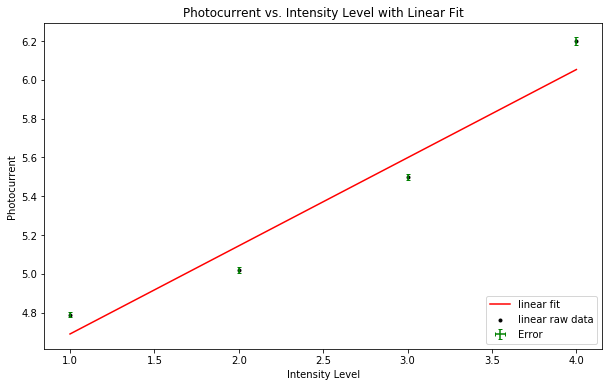

In [25]:
#Calculating chi squared
chi_sq = (1/2)*(np.sum(((photocurrent - lin_output3)/i_error)**2))
print('Chi squared for linear regression: ', chi_sq)

#Plots of Photocurrent vs Intensity Level
plt.figure(figsize=(10,6))
plt.scatter(intensitylvl, photocurrent, label = 'linear raw data', marker='.', color='k')
plt.plot(intensitylvl, lin_output3, 'r-', label = 'linear fit')
plt.title('Photocurrent vs. Intensity Level with Linear Fit')
plt.xlabel('Intensity Level')
plt.ylabel('Photocurrent')
plt.errorbar(intensitylvl, photocurrent, xerr=0, yerr=i_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend(loc='lower right')
plt.show()

In [26]:
v_error

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])